In [2]:
# from chartpy import Chart, Style
import pandas as pd

In [3]:
df = pd.read_csv('assets/annotation_example3.txt', delimiter=";")
# ~10 sec

In [14]:
df.head(5)
#df1 = df[['value', 'backvalue']]

,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,1001200171739,100129017HD,10,2017-07-07 03:07,s,88.33,131.05
1,1001200171741,100129017HD,10,2017-07-07 03:07,s,98.66,95.69
2,1001200171742,100129017HD,10,2017-07-07 03:07,s,35.03,70.90
3,1001200171743,100129017HD,10,2017-07-07 03:07,s,99.09,79.79
4,1001200171744,100129017HD,10,2017-07-07 03:07,s,82.09,143.50


findfont: Font family ['open sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['open sans'] not found. Falling back to DejaVu Sans.


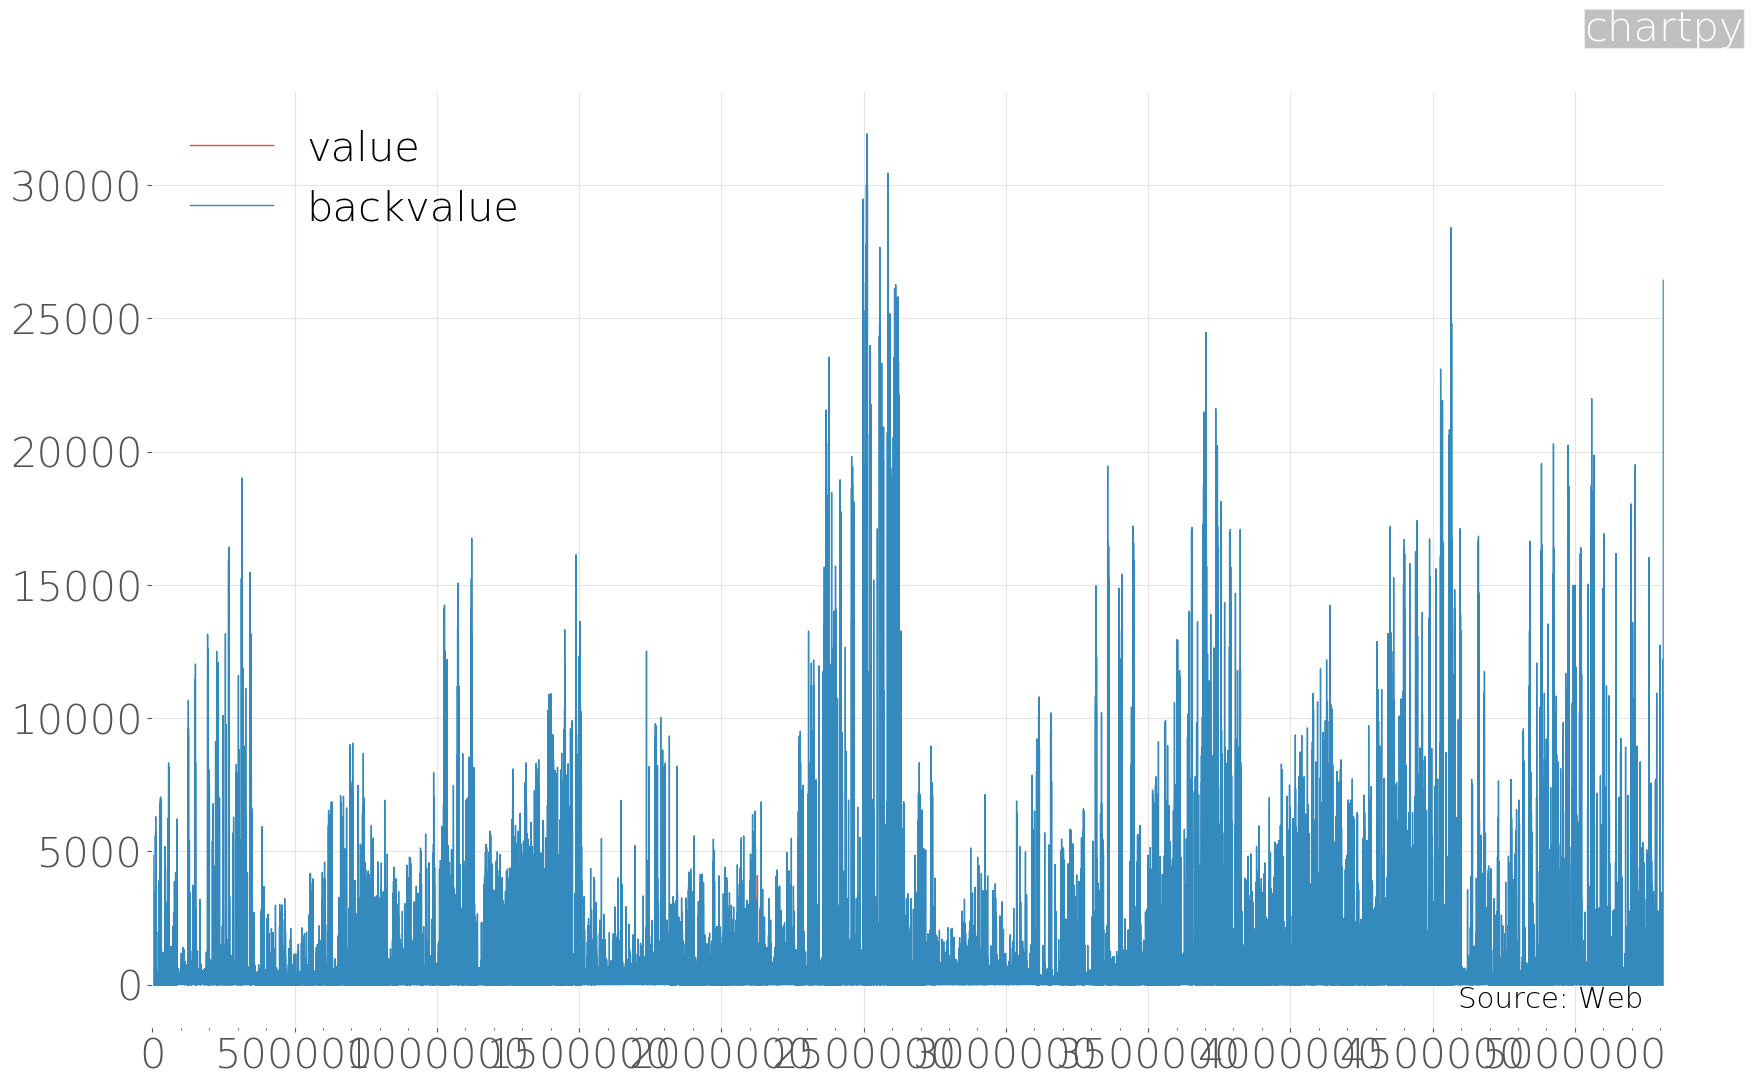

In [5]:
chart = Chart()
chart.plot(df = df1)

# set the style of the plot (title, source & scale sized)
style = Style(title="US GDP", source="Quandl/Fred", scale_factor=1)
chart = Chart(df=df, chart_type='scatter', style=style)

# make sure we plot matplotlib, bokeh and plotly inline in the notebook!
%matplotlib inline
style.bokeh_plot_mode = 'offline_jupyter'
style.plotly_plot_mode = 'offline_jupyter'

In [ ]:
chart.plot(engine='plotly')

In [6]:
chart.plot(engine='matplotlib')

TypeError: '<=' not supported between instances of 'str' and 'int'

<Figure size 600x400 with 0 Axes>

In [1]:
import seaborn as sns


now visualizing scatterlplot...
scatterplot done


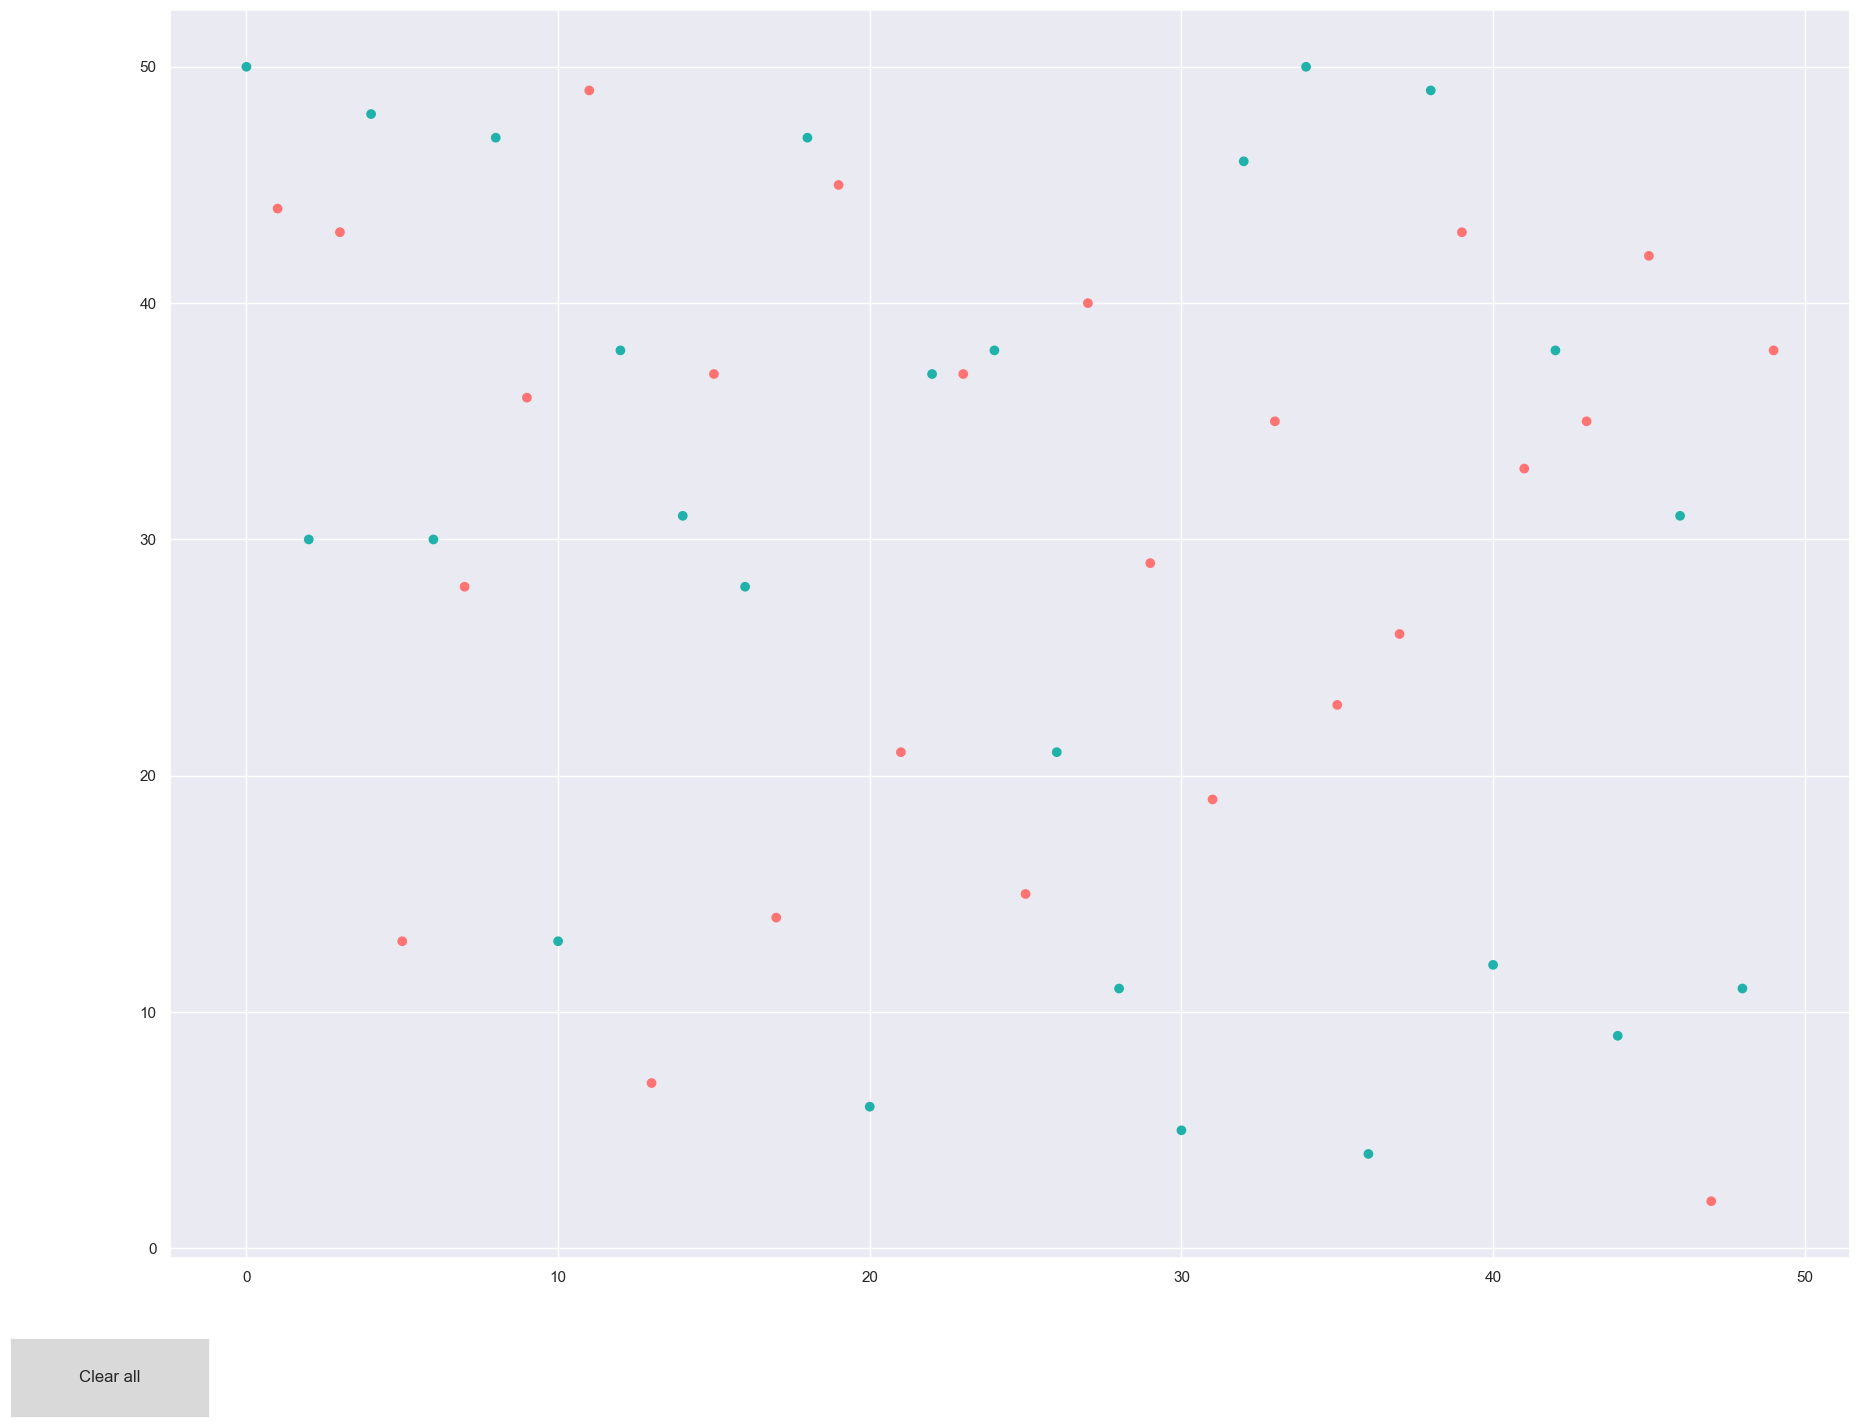

In [13]:
# import the random module since we will use it to generate the data
import random as rnd

# import the main drawing library
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.text import Annotation

# import the seaborn module which is based on matplotlib to make our visualization more presentable

# set the default style
sns.set()

# define two colors, just to enrich the example
labels_color_map = {0: '#20b2aa', 1: '#ff7373'}

# set the examples count
no_examples = 50

# generate the data needed for the scatterplot
generated_data = [(x, rnd.randint(0, no_examples)) for x in range(0, no_examples)]
generated_labels = ["Label for instance #{0}".format(i) for i in range(0, no_examples)]

print ("now visualizing scatterlplot...")

# add the values one by one to the scatterplot
instances_colors = []
axis_values_x = []
axis_values_y = []
for index, instance in enumerate(generated_data):
    # print instance, index, labels[index]
    coordinate_x, coordinate_y = instance
    color = labels_color_map[index % 2]

    instances_colors.append(color)
    axis_values_x.append(coordinate_x)
    axis_values_y.append(coordinate_y)

# draw a scatter-plot of the generated values
fig = plt.figure(figsize=(20, 16))
ax = plt.subplot()


# extract the scatterplot drawing in a separate function so we ca re-use the code
def draw_scatterplot():
    ax.scatter(
        axis_values_x,
        axis_values_y,
        c=instances_colors,
        picker=True
    )


# draw the initial scatterplot
draw_scatterplot()


# create and add an annotation object (a text label)
def annotate(axis, text, x, y):
    text_annotation = Annotation(text, xy=(x, y), xycoords='data')
    axis.add_artist(text_annotation)


# define the behaviour -> what happens when you pick a dot on the scatterplot by clicking close to it
def onpick(event):
    # step 1: take the index of the dot which was picked
    ind = event.ind

    # step 2: save the actual coordinates of the click, so we can position the text label properly
    label_pos_x = event.mouseevent.xdata
    label_pos_y = event.mouseevent.ydata

    # just in case two dots are very close, this offset will help the labels not appear one on top of each other
    offset = 0

    # if the dots are to close one to another, a list of dots clicked is returned by the matplotlib library
    for i in ind:
        # step 3: take the label for the corresponding instance of the data
        label = generated_labels[i]

        # step 4: log it for debugging purposes
        print ("index", i, label)

        # step 5: create and add the text annotation to the scatterplot
        annotate(
            ax,
            label,
            label_pos_x + offset,
            label_pos_y + offset
        )

        # step 6: force re-draw
        ax.figure.canvas.draw_idle()

        # alter the offset just in case there are more than one dots affected by the click
        offset += 0.01


# connect the click handler function to the scatterplot
fig.canvas.mpl_connect('pick_event', onpick)

# create the "clear all" button, and place it somewhere on the screen
ax_clear_all = plt.axes([0.0, 0.0, 0.1, 0.05])
button_clear_all = Button(ax_clear_all, 'Clear all')


# define the "clear all" behaviour
def onclick(event):
    # step 1: we clear all artist object of the scatter plot
    ax.cla()

    # step 2: we re-populate the scatterplot only with the dots not the labels
    draw_scatterplot()

    # step 3: we force re-draw
    ax.figure.canvas.draw_idle()


# link the event handler function to the click event on the button
button_clear_all.on_clicked(onclick)

# initial drawing of the scatterplot
plt.plot()
print ("scatterplot done")

# present the scatterplot
plt.show()

In [76]:
def signToNumber(s):
    return ['f','n','z','p','s'].index(s)*10


In [87]:
df['signNumber'] = df.sign.apply(signToNumber)
df = df[df['signNumber'] != 0]

In [85]:
df.head(5)

,value,backvalue,sign,signNumber
0,88.33,131.05,s,10
1,98.66,95.69,s,10
3,99.09,79.79,s,10
4,82.09,143.50,s,10
5,85.89,93.45,s,10


In [4]:
# Data cleansing
stdValue = df.value.std()
stdBackvalue = df.backvalue.std()
meanValue = df.value.mean()
meanBackvalue = df.backvalue.mean()
length = len(df)
print("min value: " +str(df.value.min()))
print("max value: "+str(df.value.max()))
print("meanValue: " +str(meanValue))
print("stdValue: "+ str(stdValue))
print()
print("min backvalue: " +str(df.backvalue.min()))
print("max backvalue: " +str(df.backvalue.max()))
print("meanBackvalue: " + str(meanBackvalue))
print("stdBackvalue: " +str(stdBackvalue))
print()

meanPlusMinus2StdValue = (meanValue-2*stdValue, meanValue +2*stdValue)
meanPlusMinus3StdValue = (meanValue-3*stdValue, meanValue +3*stdValue)

meanPlusMinus2StdBackvalue = (meanBackvalue -2*stdBackvalue, meanBackvalue +2*stdBackvalue)
meanPlusMinus3StdBackvalue = (meanBackvalue -3*stdBackvalue, meanBackvalue +3*stdBackvalue)

print("mean +- 2*std of value: " + str(meanPlusMinus2StdValue))
readerMeanPlusMinus2StdValue = df[(df['value'] <= meanPlusMinus2StdValue[1] )
                                          & (df['value'] >= meanPlusMinus2StdValue[0])]
print("values in range: " + str(len(readerMeanPlusMinus2StdValue)) + " equals " 
      + str(100*len(readerMeanPlusMinus2StdValue)/length) + "%")

print("mean +- 2*std of Backvalue: " + str(meanPlusMinus2StdBackvalue))
readerMeanPlusMinus2StdBackvalue = df[(df['backvalue'] <= meanPlusMinus2StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus2StdBackvalue[0])]
print("values in range: " + str(len(readerMeanPlusMinus2StdBackvalue)) + " equals " 
     + str(100*len(readerMeanPlusMinus2StdBackvalue)/length) + "%")

# cleansed dataframe 1
readerCleansedWith2Std = df[(df['value'] <= meanPlusMinus2StdValue[1] )
                                          & (df['value'] >= meanPlusMinus2StdValue[0])
                                   & (df['backvalue'] <= meanPlusMinus2StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus2StdBackvalue[0])]
print("values in specified 2std range: " +str(len(readerCleansedWith2Std)) + " equals " 
     + str(100* len(readerCleansedWith2Std)/length))
print()


print("mean +- 3*std of value: " + str(meanPlusMinus3StdValue))
readerMeanPlusMinus3StdValue = df[(df['value'] <= meanPlusMinus3StdValue[1]) 
                                          & (df['value'] >= meanPlusMinus3StdValue[0])]
print("values in range: " + str(len(readerMeanPlusMinus3StdValue)) + " equals " 
     + str(100*(len(readerMeanPlusMinus3StdValue)/length)) + "%")

print("mean +- 3*std of Backvalue: " + str(meanPlusMinus3StdBackvalue))
readerMeanPlusMinus3StdBackvalue = df[(df['backvalue'] <= meanPlusMinus3StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
print("values in range: " + str(len(readerMeanPlusMinus3StdBackvalue)) + " equals "
     + str(100*len(readerMeanPlusMinus3StdBackvalue)/length) + "%")

# cleansed dataframe 2
readerCleansedWith3Std = df[(df['value'] <= meanPlusMinus3StdValue[1] )
                                          & (df['value'] >= meanPlusMinus3StdValue[0])
                                   & (df['backvalue'] <= meanPlusMinus3StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
print("values in specified 3std range: " +str(len(readerCleansedWith3Std)) + " equals " 
     + str(100* len(readerCleansedWith3Std)/length))
print()
df = readerCleansedWith3Std

min value: 0.0
max value: 4091.47
meanValue: 94.17172570074443
stdValue: 18.70035261595012

min backvalue: 0.0
max backvalue: 31920.81
meanBackvalue: 104.88731710621013
stdBackvalue: 272.81730734819075

mean +- 2*std of value: (56.77102046884419, 131.57243093264466)
values in range: 5025228 equals 94.55586163294798%
mean +- 2*std of Backvalue: (-440.74729759017134, 650.5219318025917)
values in range: 5295746 equals 99.64599138969172%
values in specified 2std range: 5019685 equals 94.45156325264932

mean +- 3*std of value: (38.070667852894076, 150.2727835485948)
values in range: 5161719 equals 97.12410811054913%
mean +- 3*std of Backvalue: (-713.5646049383621, 923.3392391507824)
values in range: 5300551 equals 99.73640338993256%
values in specified 3std range: 5157281 equals 97.0406016678709



In [80]:
df = df[['value','backvalue','sign']]

In [84]:
df = df[df['signNumber'] != 0]

<AxesSubplot:xlabel='value', ylabel='backvalue'>

C:\Users\Buffel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


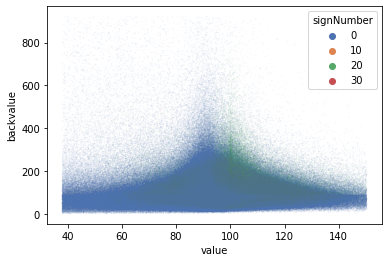

In [74]:
sns.scatterplot(data=df, x="value", y="backvalue", hue="signNumber", palette="deep", s=0.3, marker="+")
# ~4 min
# 12:14:30

In [12]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

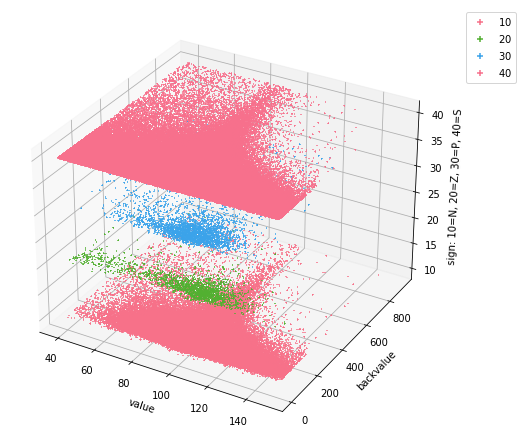

In [88]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['value'], df['backvalue'], df['signNumber'], s=0.3, c=df['signNumber'], marker='+', cmap=cmap, alpha=1)
ax.set_xlabel('value')
ax.set_ylabel('backvalue')
ax.set_zlabel('sign: 10=N, 20=Z, 30=P, 40=S')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')
# ~3min

In [82]:
def signToNumber2(s):
    return ['f','s','z','n','p'].index(s)*10


In [83]:
df['signNumber'] = df.sign.apply(signToNumber2)

In [68]:
df.head(400200)

,pos_id,barcode,run_id,test_date,sign,value,backvalue,signNumber
0,1001200171739,100129017HD,10,2017-07-07 03:07,s,88.33,131.05,0
1,1001200171741,100129017HD,10,2017-07-07 03:07,s,98.66,95.69,0
3,1001200171743,100129017HD,10,2017-07-07 03:07,s,99.09,79.79,0
4,1001200171744,100129017HD,10,2017-07-07 03:07,s,82.09,143.50,0
5,1001200171745,100129017HD,10,2017-07-07 03:07,s,85.89,93.45,0
...,...,...,...,...,...,...,...,...
426599,1SVEN00892623,1SVEN9089HD,19,2017-07-25 06:07,s,43.16,44.24,0
426600,1SVEN00892624,1SVEN9089HD,19,2017-07-25 06:07,s,39.82,5.71,0
426601,1SVEN00892625,1SVEN9089HD,19,2017-07-25 06:07,s,74.48,74.83,0
426602,1SVEN00892626,1SVEN9089HD,19,2017-07-25 06:07,s,65.71,97.76,0


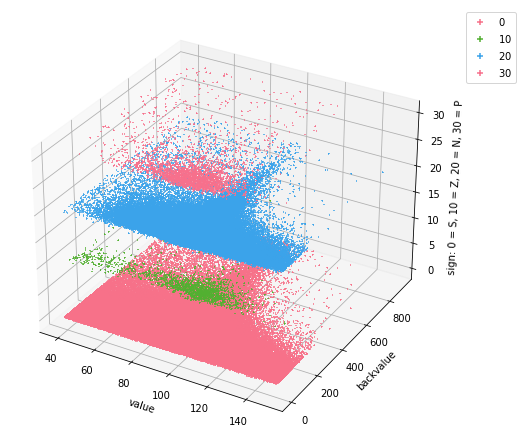

In [72]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['value'], df['backvalue'], df['signNumber'], s=0.3, c=df['signNumber'], marker='+', cmap=cmap, alpha=1)
ax.set_xlabel('value')
ax.set_ylabel('backvalue')
ax.set_zlabel('sign: 0 = S, 10 = Z, 20 = N, 30 = P')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')
# ~3min
# S,Z,N,P

In [89]:
def signToNumber3(s):
    return ['s','p','n','z'].index(s)*10


In [90]:
df['signNumber'] = df.sign.apply(signToNumber3)

In [10]:
df = df[df['signNumber'] != 0]

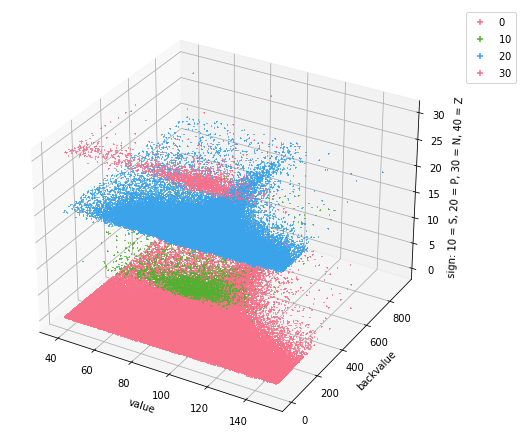

In [91]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['value'], df['backvalue'], df['signNumber'], s=0.3, c=df['signNumber'], marker='+', cmap=cmap, alpha=1)
ax.set_xlabel('value')
ax.set_ylabel('backvalue')
ax.set_zlabel('sign: 10 = S, 20 = P, 30 = N, 40 = Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go

import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename='simple-3d-scatter')

PlotlyRequestError: Authentication credentials were not provided.

In [4]:
from __future__ import division
from bokeh.core.properties import Instance, String
from bokeh.models import ColumnDataSource, LayoutDOM
from bokeh.io import show
import numpy as np


JS_CODE = """
# This file contains the JavaScript (CoffeeScript) implementation
# for a Bokeh custom extension. The "surface3d.py" contains the
# python counterpart.
#
# This custom model wraps one part of the third-party vis.js library:
#
#     http://visjs.org/index.html
#
# Making it easy to hook up python data analytics tools (NumPy, SciPy,
# Pandas, etc.) to web presentations using the Bokeh server.

# These "require" lines are similar to python "import" statements
import * as p from "core/properties"
import {LayoutDOM, LayoutDOMView} from "models/layouts/layout_dom"

# This defines some default options for the Graph3d feature of vis.js
# See: http://visjs.org/graph3d_examples.html for more details.
OPTIONS =
  width:  '700px'
  height: '700px'
  style: 'dot-color'
  showPerspective: true
  showGrid: true
  keepAspectRatio: true
  verticalRatio: 1.0
  showLegend: false
  cameraPosition:
    horizontal: -0.35
    vertical: 0.22
    distance: 1.8
  dotSizeRatio: 0.01
  tooltip: (point) -> return 'value: <b>' + point.z + '</b><br>' + 'extra: <b>' + point.data.extra




# To create custom model extensions that will render on to the HTML canvas
# or into the DOM, we must create a View subclass for the model. Currently
# Bokeh models and views are based on BackBone. More information about
# using Backbone can be found here:
#
#     http://backbonejs.org/
#
# In this case we will subclass from the existing BokehJS ``LayoutDOMView``,
# corresponding to our
export class Surface3dView extends LayoutDOMView

  initialize: (options) ->
    super(options)

    url = "http://visjs.org/dist/vis.js"

    script = document.createElement('script')
    script.src = url
    script.async = false
    script.onreadystatechange = script.onload = () => @_init()
    document.querySelector("head").appendChild(script)

  _init: () ->
    # Create a new Graph3s using the vis.js API. This assumes the vis.js has
    # already been loaded (e.g. in a custom app template). In the future Bokeh
    # models will be able to specify and load external scripts automatically.
    #
    # Backbone Views create <div> elements by default, accessible as @el. Many
    # Bokeh views ignore this default <div>, and instead do things like draw
    # to the HTML canvas. In this case though, we use the <div> to attach a
    # Graph3d to the DOM.
    @_graph = new vis.Graph3d(@el, @get_data(), OPTIONS)

    # Set Backbone listener so that when the Bokeh data source has a change
    # event, we can process the new data
    @connect(@model.data_source.change, () =>
        @_graph.setData(@get_data())
    )

  # This is the callback executed when the Bokeh data has an change. Its basic
  # function is to adapt the Bokeh data source to the vis.js DataSet format.
  get_data: () ->
    data = new vis.DataSet()
    source = @model.data_source
    for i in [0...source.get_length()]
      data.add({
        x:     source.get_column(@model.x)[i]
        y:     source.get_column(@model.y)[i]
        z:     source.get_column(@model.z)[i]
        extra: source.get_column(@model.extra)[i]
        style: source.get_column(@model.color)[i]
      })
    return data

# We must also create a corresponding JavaScript Backbone model sublcass to
# correspond to the python Bokeh model subclass. In this case, since we want
# an element that can position itself in the DOM according to a Bokeh layout,
# we subclass from ``LayoutDOM``
export class Surface3d extends LayoutDOM

  # This is usually boilerplate. In some cases there may not be a view.
  default_view: Surface3dView

  # The ``type`` class attribute should generally match exactly the name
  # of the corresponding Python class.
  type: "Surface3d"

  # The @define block adds corresponding "properties" to the JS model. These
  # should basically line up 1-1 with the Python model class. Most property
  # types have counterparts, e.g. ``bokeh.core.properties.String`` will be
  # ``p.String`` in the JS implementatin. Where the JS type system is not yet
  # as rich, you can use ``p.Any`` as a "wildcard" property type.
  @define {
    x:           [ p.String           ]
    y:           [ p.String           ]
    z:           [ p.String           ]
    color:       [ p.String           ]
    extra:       [ p.String           ]
    data_source: [ p.Instance         ]
  }
"""

# This custom extension model will have a DOM view that should layout-able in
# Bokeh layouts, so use ``LayoutDOM`` as the base class. If you wanted to create
# a custom tool, you could inherit from ``Tool``, or from ``Glyph`` if you
# wanted to create a custom glyph, etc.
class Surface3d(LayoutDOM):

    # The special class attribute ``__implementation__`` should contain a string
    # of JavaScript (or CoffeeScript) code that implements the JavaScript side
    # of the custom extension model.
    __implementation__ = JS_CODE

    # Below are all the "properties" for this model. Bokeh properties are
    # class attributes that define the fields (and their types) that can be
    # communicated automatically between Python and the browser. Properties
    # also support type validation. More information about properties in
    # can be found here:
    #
    #    https://docs.bokeh.org/en/latest/docs/reference/core.html#bokeh-core-properties

    # This is a Bokeh ColumnDataSource that can be updated in the Bokeh
    # server by Python code
    data_source = Instance(ColumnDataSource)

    # The vis.js library that we are wrapping expects data for x, y, z, and
    # color. The data will actually be stored in the ColumnDataSource, but
    # these properties let us specify the *name* of the column that should
    # be used for each field.
    x = String
    y = String
    z = String
    extra = String
    color = String




X_data = np.random.normal(0,10,100)
Y_data = np.random.normal(0,5,100)
Z_data = np.random.normal(0,3,100)
color = np.asarray([0 for x in range(50)]+[1 for x in range(50)])
extra = np.asarray(['a' for x in range(50)]+['b' for x in range(50)])


source = ColumnDataSource(data=dict(x=X_data, y=Y_data, z=Z_data, color = color, extra=extra))

surface = Surface3d(x="x", y="y", z="z", extra="extra", color="color", data_source=source)

show(surface)
